# Introduction

This project involves examining the 2019 regular season MLB pitching and hitting statistics for players (This is our training data). We will also bring in the current 2020 regular season MLB pitching and hitting stats (this is our testing data).
 
- All datasets were pulled from:  https://www.rotowire.com/baseball/stats.php

***

# MLB Pitching Analysis and Model Building

We will examine a model to predict whether or not a team has good pitchers - predicting the results of games based on W (Wins Earned). To accomplish this, we will compare 3 models.

## Model building:

- Linear Regression
- Decision Tree
- Random Forest

Each model will be evaluated based on R2 score


## Why use R2 score?

R-Squared is a statistical measure of fit that indicates how much variation of a dependent variable is explained by the independent variable(s) in a regression model.

R-squared values range from 0 to 1 and are commonly stated as percentages from 0% to 100% where 100% means that all movements of a dependent variable are completely explained by movements in the independent variable(s) you are interested in.


## To Do List:
- Imports
- Clean the data if need be
- Visualize the data and relationships
- Start building models
- Fine tune the models
- Find the best models for the datasets
- Compare the test data and the predictions

In [4]:
# Required Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor

In [9]:
# Read-in 2019 Pitching Data
df_pitch = pd.read_csv('data/pitching_data/mlb-pitching-2019.csv', index_col='Player')
df_pitch.head()

,Team,Age,G,GS,CG,SHO,IP,H,ER,K,BB,HR,W,L,SV,BS,HLD,ERA,WHIP
Player,,,,,,,,,,,,,,,,,,,
Justin Verlander,HOU,37,34,34,2,1,223.0,137,64,300,42,36,21,6,0,0,0,2.58,0.80
Shane Bieber,CLE,25,34,33,3,2,214.1,186,78,259,40,31,15,8,0,0,0,3.28,1.05
Gerrit Cole,HOU,29,33,33,0,0,212.1,142,59,326,48,29,20,5,0,0,0,2.50,0.89
Stephen Strasburg,WAS,32,33,33,0,0,209.0,161,77,251,56,24,18,6,0,0,0,3.32,1.04
Mike Minor,TEX,32,32,32,2,1,208.1,190,83,200,68,30,14,10,0,0,0,3.59,1.24


In [10]:
# Describe Data
df_pitch.describe()

,Age,G,GS,CG,SHO,IP,H,ER,K,BB,HR,W,L,SV,BS,HLD,ERA,WHIP
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,29.049312,24.470183,5.571101,0.051606,0.029817,49.449541,48.061927,24.824541,49.074541,18.172018,7.733945,2.785550,2.784404,1.352064,0.787844,2.815367,5.901456,1.568979
std,3.517527,19.554018,9.612563,0.280801,0.189339,49.913335,47.576281,23.209626,51.865699,16.011125,7.812989,3.696726,3.237884,5.039786,1.519015,5.455095,7.724401,1.072112
min,20.000000,1.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,9.000000,0.000000,0.000000,0.000000,13.000000,14.000000,8.000000,11.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.647500,1.220000
50%,29.000000,20.000000,0.000000,0.000000,0.000000,33.100000,33.000000,17.000000,31.500000,13.500000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,4.750000,1.410000
75%,31.000000,33.000000,7.000000,0.000000,0.000000,65.025000,62.000000,33.000000,69.250000,26.000000,10.000000,4.000000,4.000000,0.000000,1.000000,3.000000,6.390000,1.680000
max,43.000000,83.000000,34.000000,3.000000,2.000000,223.000000,225.000000,110.000000,326.000000,86.000000,39.000000,21.000000,17.000000,41.000000,9.000000,31.000000,162.000000,21.000000


In [11]:
#Get info on the Data
df_pitch.info()

<class 'pandas.core.frame.DataFrame'>
Index: 872 entries, Justin Verlander to Taylor Hearn
Data columns (total 19 columns):
Team    872 non-null object
Age     872 non-null int64
G       872 non-null int64
GS      872 non-null int64
CG      872 non-null int64
SHO     872 non-null int64
IP      872 non-null float64
H       872 non-null int64
ER      872 non-null int64
K       872 non-null int64
BB      872 non-null int64
HR      872 non-null int64
W       872 non-null int64
L       872 non-null int64
SV      872 non-null int64
BS      872 non-null int64
HLD     872 non-null int64
ERA     872 non-null float64
WHIP    872 non-null float64
dtypes: float64(3), int64(15), object(1)
memory usage: 136.2+ KB


In [12]:
#Drop Team Column
df_pitch = df_pitch.drop(['Team'], axis=1)

In [13]:
#Get info on the Data
df_pitch.info()

<class 'pandas.core.frame.DataFrame'>
Index: 872 entries, Justin Verlander to Taylor Hearn
Data columns (total 18 columns):
Age     872 non-null int64
G       872 non-null int64
GS      872 non-null int64
CG      872 non-null int64
SHO     872 non-null int64
IP      872 non-null float64
H       872 non-null int64
ER      872 non-null int64
K       872 non-null int64
BB      872 non-null int64
HR      872 non-null int64
W       872 non-null int64
L       872 non-null int64
SV      872 non-null int64
BS      872 non-null int64
HLD     872 non-null int64
ERA     872 non-null float64
WHIP    872 non-null float64
dtypes: float64(3), int64(15)
memory usage: 129.4+ KB


## Correlation Matrix

The correlation matrix allows us to compare the various data points to identify how correlated each is to the others.  From this information, we can determine which features to use for building our models.

In [15]:
# Correlation Matrix of quantitative features
c_pitch = df_pitch.corr()

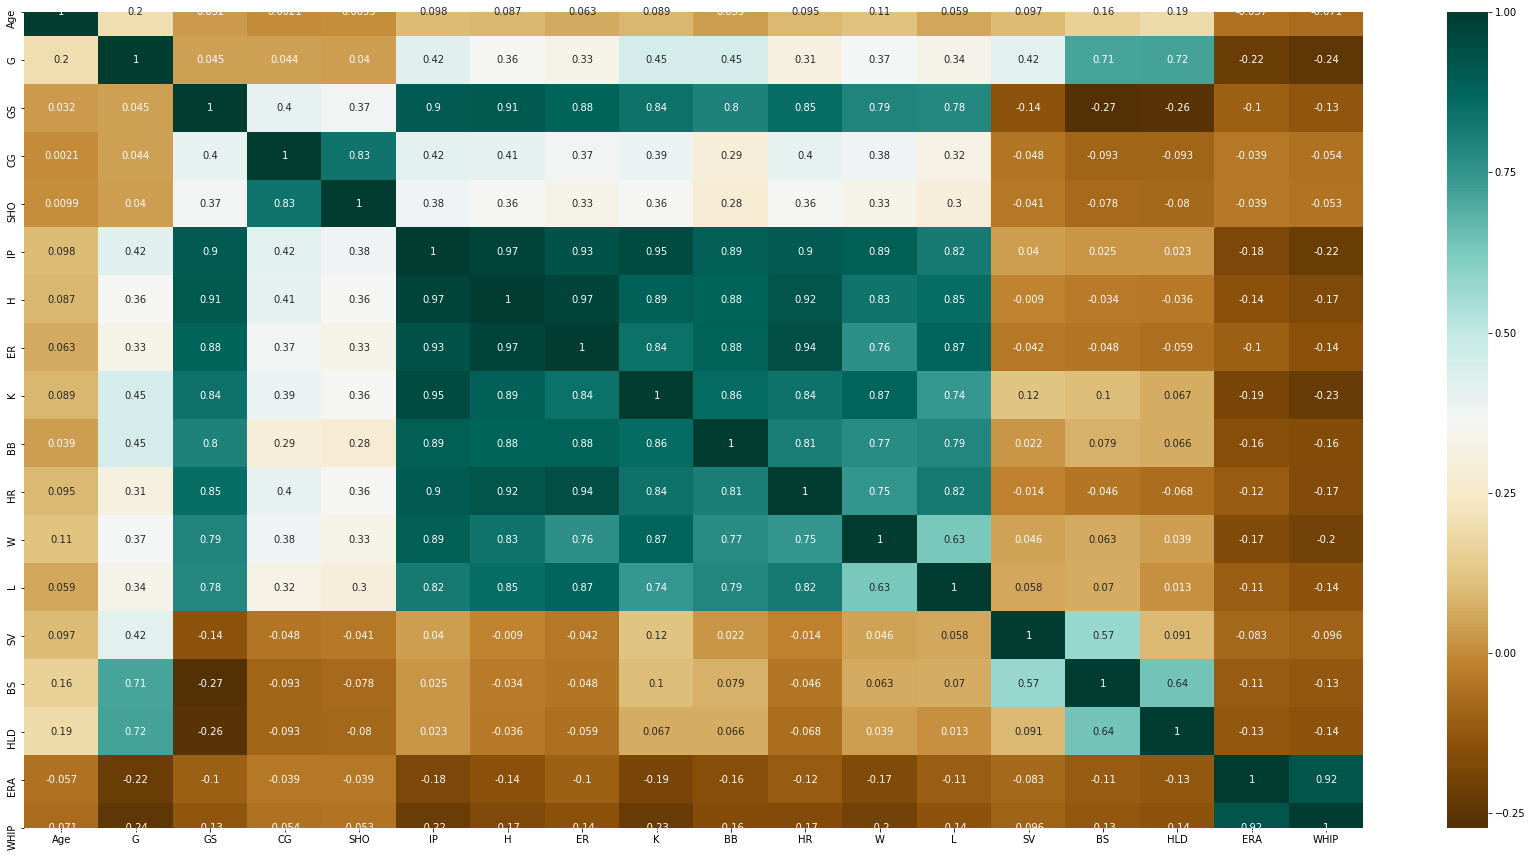

In [18]:
#visualizing the correlation matrix
plt.figure(figsize=(30,15))
sns.heatmap(c_pitch,cmap="BrBG", annot=True)

In [19]:
# Getting Features that have a correlation of greater than 0.5 for model building

selected_features = []
for i in range(len(c_pitch['W'])):
  if c_pitch['W'].values[i] >= 0.5 and c_pitch['W'].values[i] != 1.0:
    selected_features.append(c_pitch['W'].index[i])
  
selected_features

['GS', 'IP', 'H', 'ER', 'K', 'BB', 'HR', 'L']

# Splitting the Data to train and test the various models.

In [20]:
X_ = df_pitch[selected_features]
y_ = df_pitch.W

In [21]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_,test_size = .20)

## Linear Regression

In [23]:
# Linear Regression Pipeline
lr = Pipeline(steps=[('LinReg', LinearRegression())])
lr.fit(X_train_, y_train_)

lr_preds_ = lr.predict(X_test_)
print(f'Linear Regression model R2 score:  {r2_score(y_test_, lr_preds_)}')

Linear Regression model R2 score:  0.8781408059140852


## Decision Trees

In [24]:
#Hyperparameter optimization for DecisionTreeRegressor
parameters_ = {
    'max_depth':[15,20,30],
}
dtc_ = Pipeline(steps=[('CV',GridSearchCV(DecisionTreeRegressor(), parameters_, cv = 5))])
dtc_.fit(X_train_, y_train_)
dtc_.named_steps['CV'].best_params_

{'max_depth': 20}

In [25]:
# DecisionTrees pipeline 
dt_ = Pipeline(steps=[('LogReg', DecisionTreeRegressor(max_depth=20))])
dt_.fit(X_train_,y_train_)
dt_preds_ = dt_.predict(X_test_)
print(f'Decision Trees model R2 score:  {r2_score(y_test_, dt_preds_)}')

Decision Trees model R2 score:  0.763331078476185


## Random Forest

In [26]:
# Hyperparameter optimization of RandomForestClassifier
parameters = {
    'max_depth':[6,12,15,20],
    'n_estimators':[20,30]
}
rfc = Pipeline([('CV',GridSearchCV(RandomForestRegressor(), parameters, cv = 5))])
rfc.fit(X_train_, y_train_)
rfc.named_steps['CV'].best_params_

{'max_depth': 6, 'n_estimators': 20}

In [27]:
# RandomForestTrees pipeline 
rf = Pipeline(steps=[('LogReg', RandomForestRegressor(max_depth=6,n_estimators=30))])
rf.fit(X_train_,y_train_)
rf_preds = rf.predict(X_test_)
print(f'Random Forest model R2 score:  {r2_score(y_test_,rf_preds)}')

Random Forest model R2 score:  0.8623713979584297


### Compare predictions from the original 2019 testing data.

We use our best model to show the predicted wins compared to the real W (Wins earned) by the players.

In [29]:
y_pred = lr.predict(X_)

In [30]:
predictions_df = pd.DataFrame({'Real W':df_pitch.W, 'Predicted W':y_pred})

In [31]:
predictions_df.head()

,Real W,Predicted W
Player,,
Justin Verlander,21,16.724898
Shane Bieber,15,15.169736
Gerrit Cole,20,16.515265
Stephen Strasburg,18,15.362651
Mike Minor,14,13.801098


In [39]:
# Exporting Model for later use
import pickle

filename_lr = 'lr_pitching_model.sav'
pickle.dump(lr, open(filename_lr, 'wb'))

---

### 2020 Pitching Predictions

Now we are going to test our model again using the 2020 independent data to predict the 2020 actual results.

In [33]:
#Read in new Data
df = pd.read_csv('data/pitching_data/mlb-pitching-2020.csv', index_col='Player')
df.head()
df = df.drop(['Team'], axis=1)
df.head()

,Age,G,GS,CG,SHO,IP,H,ER,K,BB,HR,W,L,SV,BS,HLD,ERA,WHIP
Player,,,,,,,,,,,,,,,,,,
Dylan Bundy,27,4,4,1,0,28.2,15,5,35,3,2,3,1,0,0,0,1.57,0.63
Shane Bieber,25,4,4,0,0,27.2,16,5,43,5,4,3,0,0,0,0,1.63,0.76
German Marquez,25,4,4,0,0,26.0,18,6,27,6,2,2,2,0,0,0,2.08,0.92
Kyle Freeland,27,4,4,0,0,25.2,21,7,13,7,4,2,0,0,0,0,2.45,1.09
Sonny Gray,30,4,4,0,0,24.0,14,6,35,8,2,3,1,0,0,0,2.25,0.92


In [34]:
# List of Features that will help test the model
features = ['GS', 'IP', 'H', 'ER', 'K', 'BB', 'HR', 'L']

c = df.corr()
selected_features = []
for i in range(len(c['W'])):
  if c['W'].values[i] >= 0.5 and c['W'].values[i] != 1.0:
    selected_features.append(c['W'].index[i])
  
selected_features

['IP', 'K']

In [35]:
# Creating X and y
X = df[features]
y = df.W

In [36]:
#This is a single test from 2016 stats - Justin Verlander
fake_test = pd.DataFrame({
    'GS':34,
    'IP':223.0,
    'H':137,
    'ER':64,
    'K':300,
    'BB':42,
    'HR':36,
    'L':6
}, index=[0])
fake_test.head()

,GS,IP,H,ER,K,BB,HR,L
0,34,223.0,137,64,300,42,36,6


In [40]:
# Load in Model
loaded_model = pickle.load(open('lr_pitching_model.sav', 'rb'))

In [41]:
#Making predictions
y_pred = loaded_model.predict(X)

# Quick Predictions to see if our model is any good because the 2020 data is very sparse at the moment
fake_pred = loaded_model.predict(fake_test)

# He was accreddited 20 wins for the 2016 season
print(f"Accual wins: 20, Predicted Wins: {fake_pred}")

Accual wins: 20, Predicted Wins: [16.72489839]


In [42]:
# Getting r2 score
r2_score(y, y_pred)

0.3292138169375318

In [43]:
# Making new DataFrame with real vs predicted
df_tested = pd.DataFrame({'Real W':y, 'Predicted W':y_pred})

In [44]:
df_tested.head()

,Real W,Predicted W
Player,,
Dylan Bundy,3,2.121253
Shane Bieber,3,2.186080
German Marquez,2,1.636304
Kyle Freeland,2,1.863217
Sonny Gray,3,1.678681


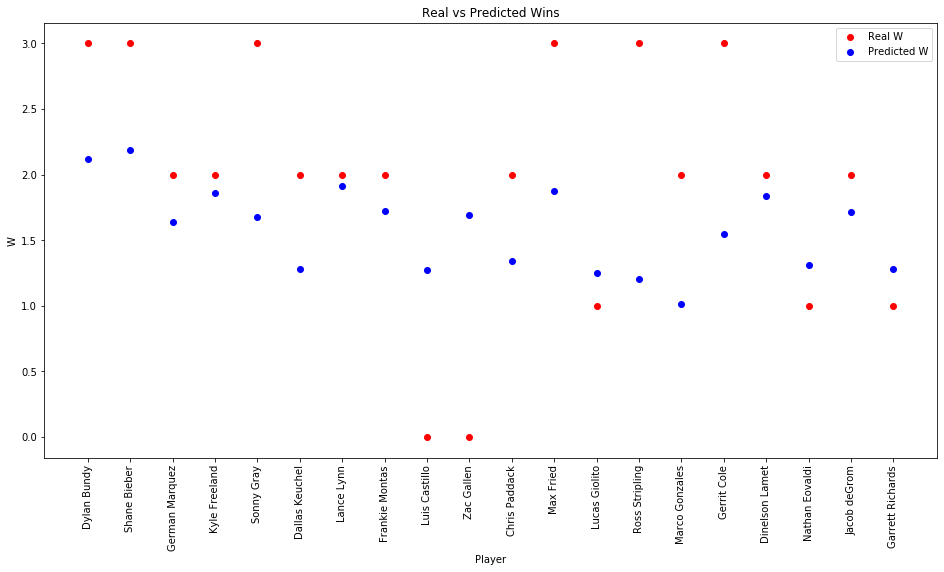

In [45]:
# Plot out test data vs predicted
plt.figure(figsize=(16,8))
plt.title('Real vs Predicted Wins')
plt.scatter(df_tested.index[:20], df_tested['Real W'][:20], color='r')
plt.scatter(df_tested.index[:20], df_tested['Predicted W'][:20], color='blue')
plt.ylabel('W')
plt.xlabel('Player')
plt.xticks(rotation=90)
plt.legend(['Real W', 'Predicted W'])

## Findings

The 2020 MLB season and the players stats will be heavily effected by lack of games that will be played (60 total games). 

***

# 2019 MLB Hitting Analysis and Model Building

### About the data
- All datasets were pulled from:  https://www.rotowire.com/baseball/stats.php


## Project Overview

In this notebook, we will examine a model to predict whether or not a team has good hitters - predicting the results of games based on W (Wins Earned). 

To accomplish this, we will examine 5 models.

#### Model building:

- Linear Regression
- RandomForest
- Lasso
- Ridge
- Elastic Net

Each model will be evaluated based on model score, MAE, and MSE.

In [46]:
#Model Building Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

#Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
# Read in dataset
df = pd.read_csv('data/hitting_data/2019-batting-players.csv', index_col='Player')

In [48]:
# looking at the first 5 rows of data
df.head(5)

,Team,Pos,Age,G,AB,R,H,2B,3B,HR,...,CS,BB,SO,SH,SF,HBP,AVG,OBP,SLG,OPS
Player,,,,,,,,,,,,,,,,,,,,,
Whit Merrifield,KC,2B,31,162,681,105,206,41,10,16,...,10,45,126,0,4,5,0.302,0.348,0.463,0.811
Marcus Semien,OAK,SS,29,162,657,123,187,43,7,33,...,8,87,102,0,1,2,0.285,0.369,0.522,0.891
Rafael Devers,BOS,3B,23,156,647,129,201,54,4,32,...,8,48,119,1,2,4,0.311,0.361,0.555,0.916
Jonathan Villar,BAL,2B,29,162,642,111,176,33,5,24,...,9,61,176,2,4,4,0.274,0.339,0.453,0.792
Ozzie Albies,ATL,2B,23,160,640,102,189,43,8,24,...,4,54,112,0,4,4,0.295,0.352,0.500,0.852


In [49]:
df = df.drop('Team', axis=1)

In [50]:
# Describing the dataset
print(round(df.describe()))

         Age      G     AB      R      H     2B     3B     HR    RBI     SB  \
count  694.0  694.0  694.0  694.0  694.0  694.0  694.0  694.0  694.0  694.0   
mean    29.0   72.0  234.0   33.0   60.0   12.0    1.0   10.0   32.0    3.0   
std      4.0   51.0  191.0   31.0   54.0   11.0    2.0   11.0   31.0    6.0   
min     21.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
25%     26.0   25.0   56.0    6.0   12.0    2.0    0.0    1.0    5.0    0.0   
50%     28.0   69.0  191.0   26.0   44.0    9.0    0.0    6.0   23.0    1.0   
75%     31.0  120.0  392.0   54.0  100.0   20.0    2.0   15.0   53.0    4.0   
max     46.0  162.0  681.0  135.0  206.0   54.0   10.0   53.0  126.0   46.0   

          CS     BB     SO     SH     SF    HBP    AVG    OBP    SLG    OPS  
count  694.0  694.0  694.0  694.0  694.0  694.0  694.0  694.0  694.0  694.0  
mean     1.0   23.0   58.0    0.0    2.0    3.0    0.0    0.0    0.0    1.0  
std      2.0   23.0   47.0    1.0    2.0    4.0    0.0

In [51]:
# Getting count of missing values
missing_value_count = df.isnull().sum()

# Getting missing values for all columns
missing_value_count[:len(df.columns)]

Pos    0
Age    0
G      0
AB     0
R      0
H      0
2B     0
3B     0
HR     0
RBI    0
SB     0
CS     0
BB     0
SO     0
SH     0
SF     0
HBP    0
AVG    0
OBP    0
SLG    0
OPS    0
dtype: int64

### There are no missing values in this dataset

Below we have defined several functions that will help to visualize the relationships between data points.

In [52]:
# Visualization Functions
def create_distplot(df, column):
  plt.figure(figsize=(10,5))
  plt.title(f"Displot: {column}")
  sns.distplot(df[column], hist=True, color="g", kde_kws={"shade": True})

def create_scatter(df, x, y):
  plt.figure(figsize=(10,5))
  plt.title(f"Scatter: {x} vs {y}")
  sns.scatterplot(df[x], df[y])

def create_heatmap(df):
  corr = df.corr()
  plt.figure(figsize=(16,8))
  # Generate a custom diverging colormap
  cmap = sns.diverging_palette(220, 10, as_cmap=True)

  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})
  
def create_lineplot(df, x, y, hue=None, style=None):
  plt.figure(figsize=(16,8))
  plt.title(f"Lineplot: {x} vs {y}")
  sns.lineplot(x=x, y=y,
               hue = hue,
               style=style,
               data=df)

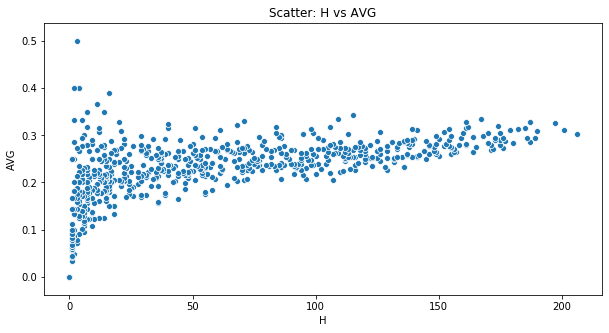

In [53]:
# Scatter for Hits vs Batting Average
create_scatter(df, 'H', 'AVG')

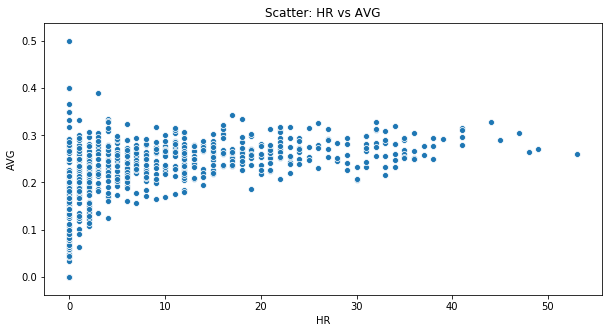

In [54]:
# Scatter for Homeruns vs Batting Average
create_scatter(df, 'HR', 'AVG')

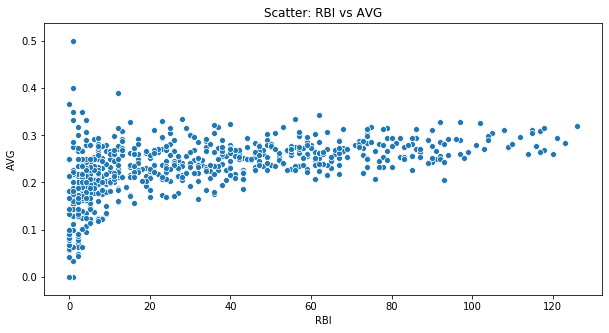

In [55]:
#Scatter for Runs Batted In vs Batting Average
create_scatter(df, 'RBI', 'AVG')

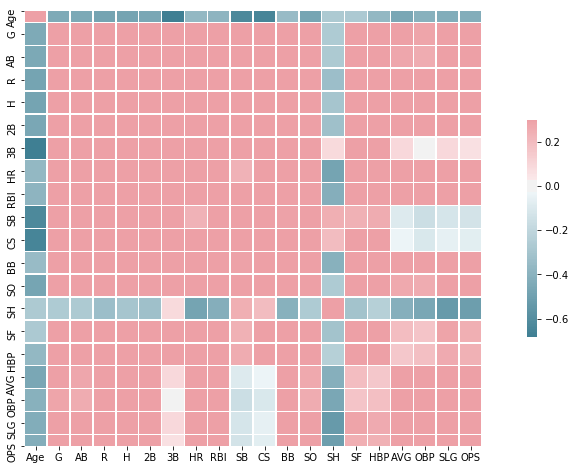

In [56]:
#Heatmap for data
create_heatmap(df.corr())

In [57]:
# Getting all cont features in one list
cont_features = df[['Age',
 'G',
 'AB',
 'R',
 'H',
 '2B',
 '3B',
 'HR',
 'RBI',
 'SB',
 'CS',
 'BB',
 'SO',
 'SH',
 'SF',
 'HBP',
 'AVG',
 'OBP',
 'SLG',
 'OPS']]

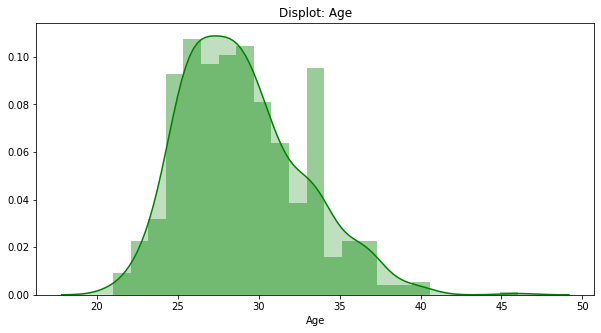

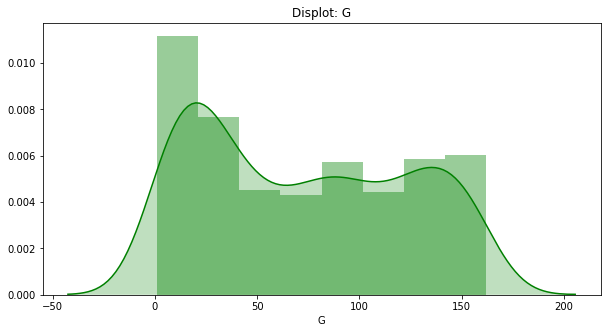

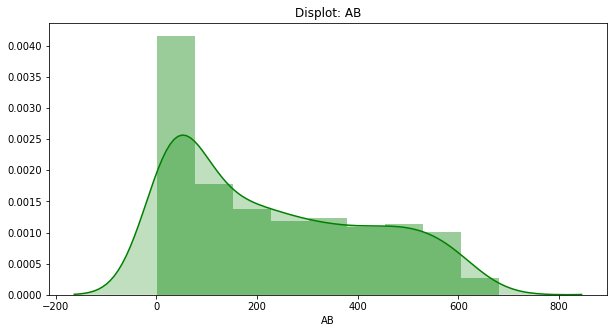

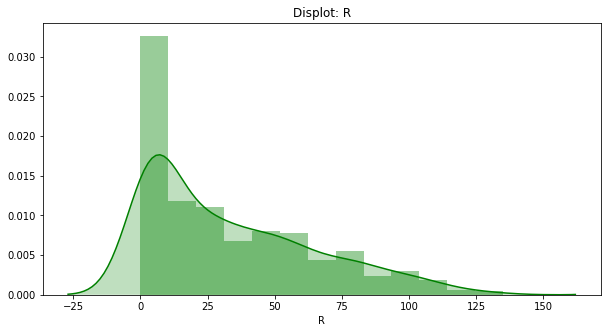

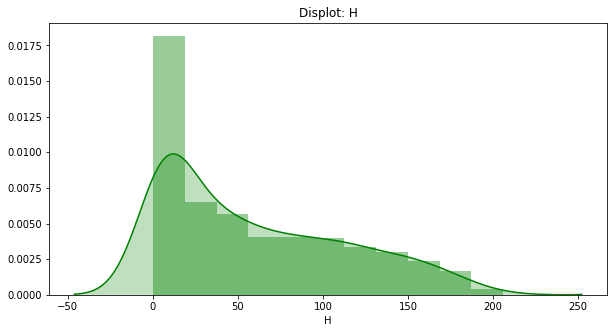

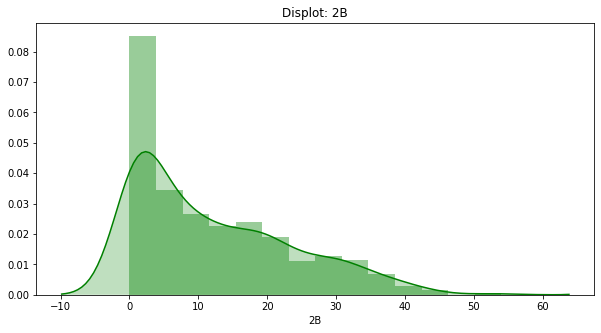

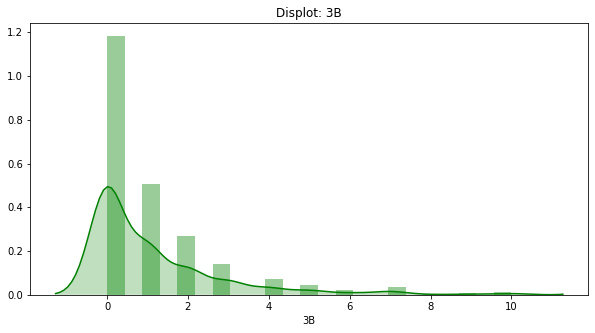

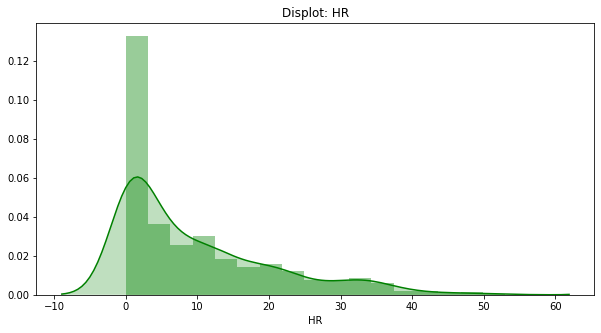

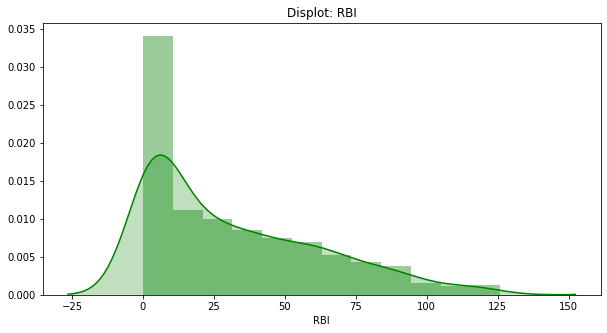

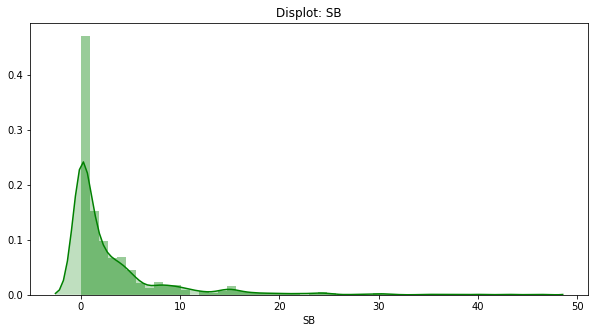

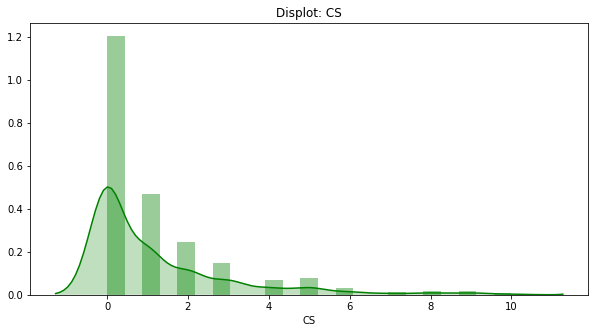

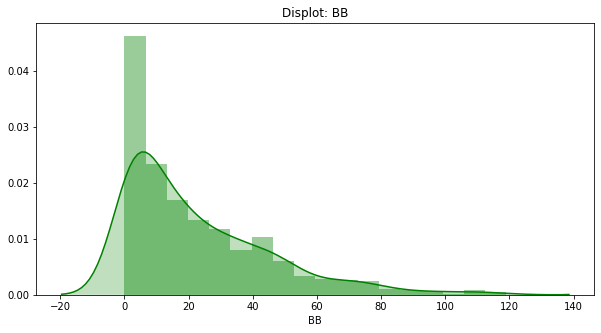

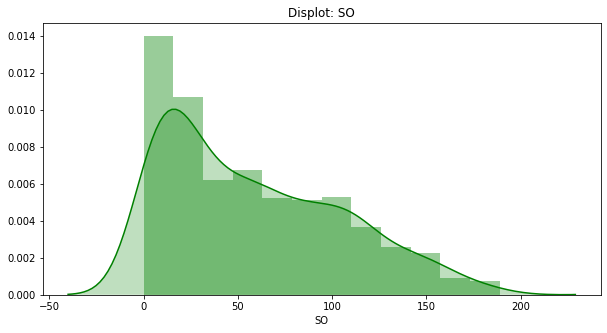

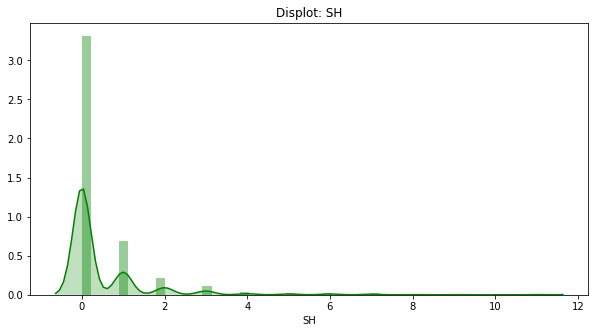

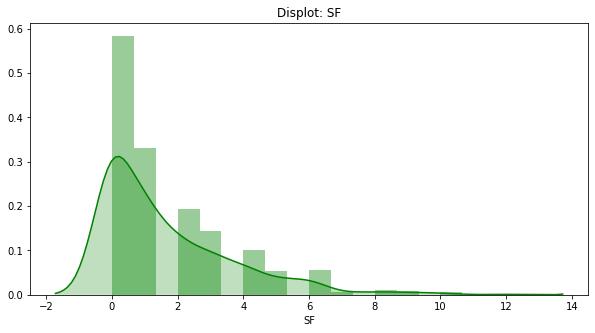

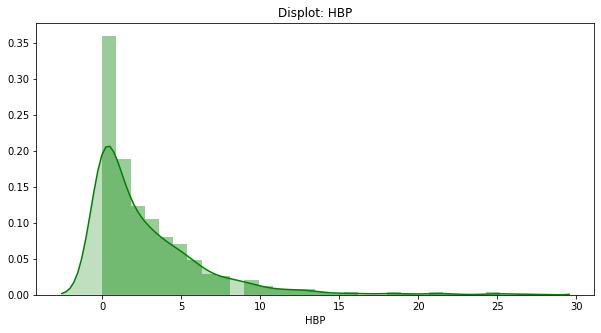

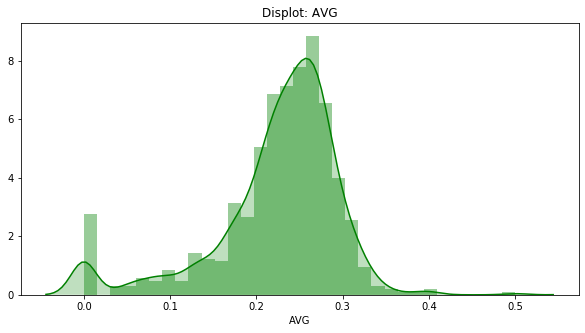

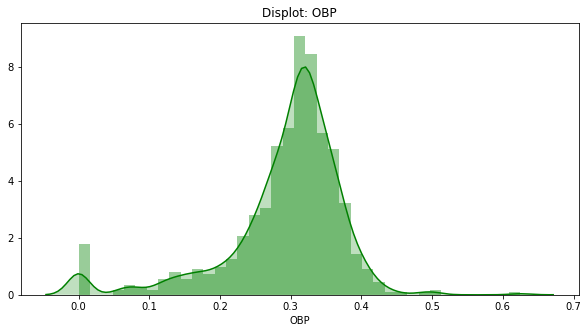

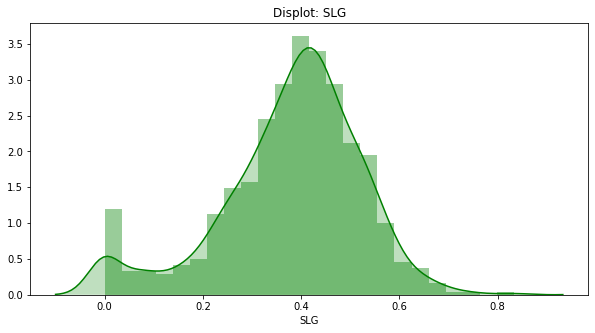

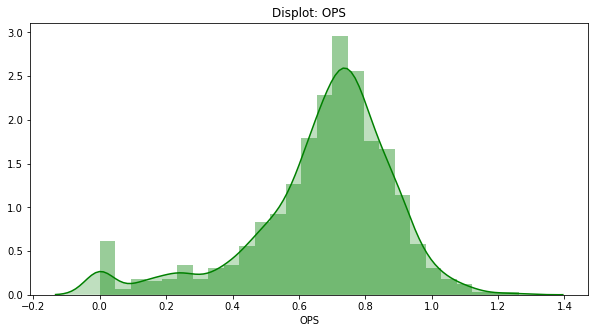

In [58]:
# making dist plots for all cont features
for feature in cont_features:
  create_distplot(df, feature)

## Correlation Matrix

The correlation matrix allows us to compare the various data points to identify how correlated each is to the others.  From this information, we can determine which features to use for building our models.

In [60]:
df_corr = df.corr()
c = df_corr

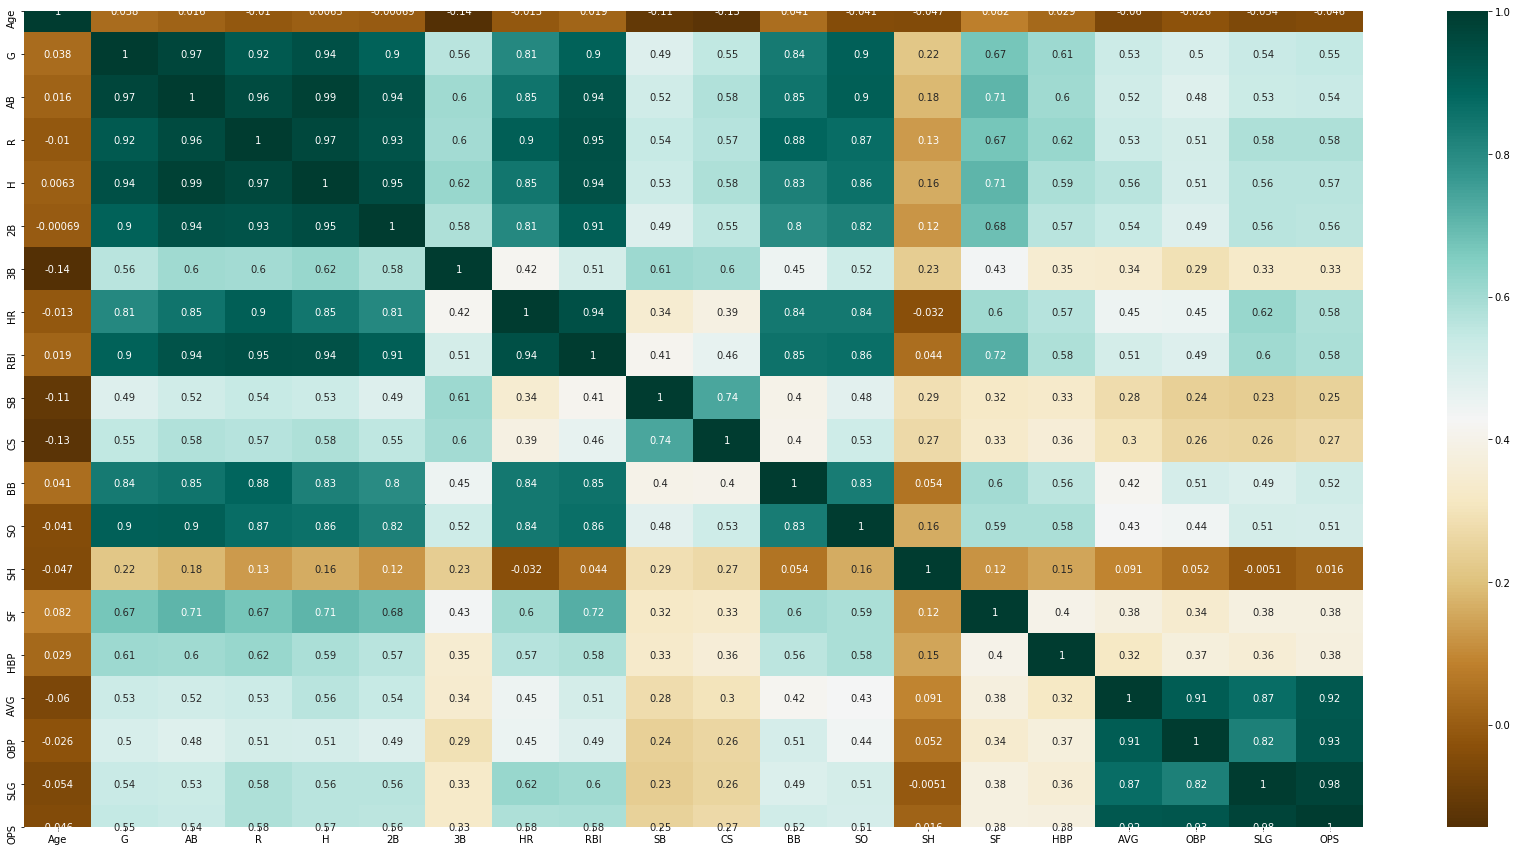

In [61]:
#visualizing the correlation matrix
plt.figure(figsize=(30,15))
sns.heatmap(c,cmap="BrBG", annot=True)

In [62]:
# Getting Features that have a correlation of greater than 0.5 for model building

selected_features = []
for i in range(len(df_corr['AVG'])):
  if df_corr['AVG'].values[i] >= 0.5 and df_corr['AVG'].values[i] != 1.0:
    selected_features.append(df_corr['AVG'].index[i])

In [63]:
selected_features

['G', 'AB', 'R', 'H', '2B', 'RBI', 'OBP', 'SLG', 'OPS']

# Splitting the Data to train and test the various models.

In [64]:
# Splitting Data into train and test
X = df[selected_features]
y = df['AVG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Evaluating the Models

The Mean absolute error (MAE) is a linear score which means that all the individual differences are weighted equally in the average. 

Mean squared error (MSE) is a quadratic scoring rule which measures the average magnitude of the error.

In [65]:
#Function to test different Models
def test_model(model_to_test, X_test, X_train, y_test, y_train):
    f_steps = [
                ('model', model_to_test)
      ]

    f_pipe = Pipeline(steps=f_steps)
    f_pipe.fit(X_train, y_train)

    f_preds = f_pipe.predict(X_test)
    print("-" * 10 + " Model Stats " + "-" * 10)
    print('\n')
    print(f"Model Score: {f_pipe.score(X_test, y_test)}")
    print(f"MAE: {mean_absolute_error(y_test, f_preds)}")
    print(f"MSE: {mean_squared_error(y_test, f_preds)}")
    print('\n')
    print('-' * 80)
    print('\n')
    plt.figure(figsize=(10,5))
    plt.title("Model Predictions")
    plt.scatter(y_test.index[:20], y_test.values[:20])
    plt.scatter(y_test.index[:20], f_preds[:20])
    plt.xticks(rotation=90)
    plt.legend(['Test Data', 'Predictions'])

    return f_pipe

## Linear Regression

---------- Model Stats ----------


Model Score: 0.9187604943587891
MAE: 0.014853109946630388
MSE: 0.00045391520458787094


--------------------------------------------------------------------------------




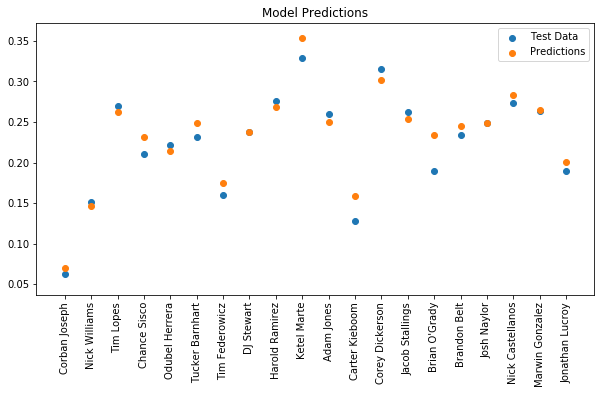

In [66]:
#LinearRegression
lr_model = test_model(LinearRegression(), X_test, X_train, y_test, y_train)

## Random Forest

C:\Users\ajohn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


---------- Model Stats ----------


Model Score: 0.9043429972304898
MAE: 0.017429665071770333
MSE: 0.0005344711004784687


--------------------------------------------------------------------------------




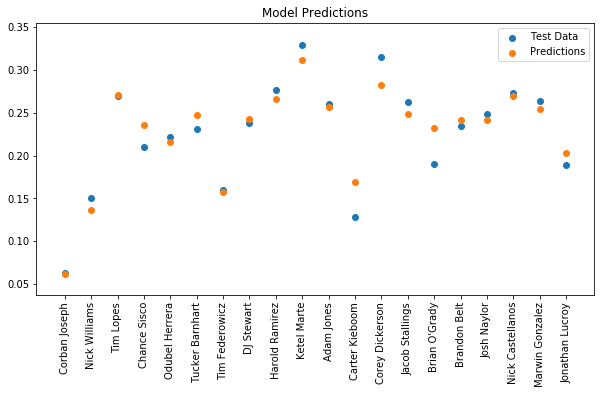

In [69]:
rf_model = test_model(RandomForestRegressor(), X_test, X_train, y_test, y_train)

## Lasso

---------- Model Stats ----------


Model Score: 0.2729043574866312
MAE: 0.04383332040503874
MSE: 0.00406255263029301


--------------------------------------------------------------------------------




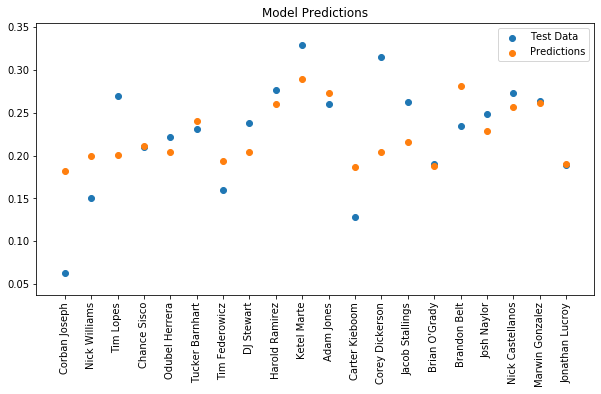

In [70]:
#Lasso Model
lasso_model = test_model(Lasso(alpha=0.3), X_test, X_train, y_test, y_train)

## Ridge

---------- Model Stats ----------


Model Score: 0.9206065867525154
MAE: 0.01527158909919121
MSE: 0.0004436004026947227


--------------------------------------------------------------------------------




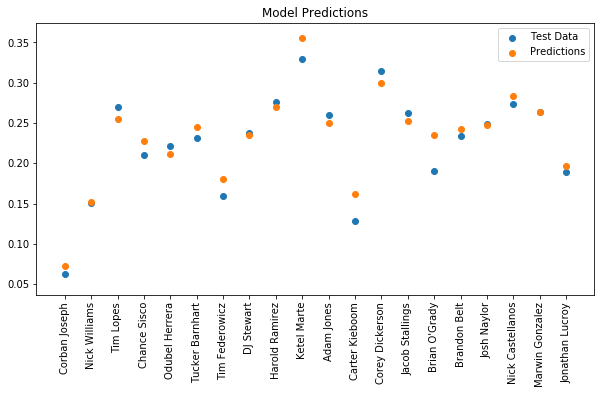

In [71]:
#Ridge Model
ridge_model = test_model(Ridge(alpha=0.7), X_test, X_train, y_test, y_train)

## Elastic Net

---------- Model Stats ----------


Model Score: 0.2836291324956156
MAE: 0.043171534818293424
MSE: 0.004002629340460822


--------------------------------------------------------------------------------




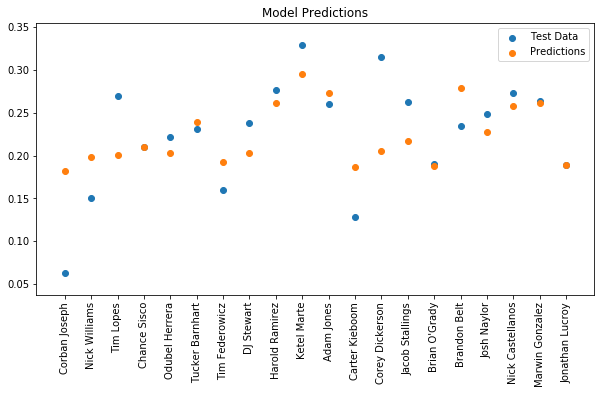

In [72]:
#ElasticNet Model
elastic_model = test_model(ElasticNet(alpha=0.5), X_test, X_train, y_test, y_train)

***

### 2020 Pitching Predictions

Now we are going to test our model again using the 2020 independent data to predict the 2020 actual results.

In [73]:
# Bring in 2020 Data
df_2020 = pd.read_csv('data/hitting_data/2020-batting-players.csv', index_col='Player')

In [74]:
#Split out data into X and y
X_2020 = df_2020[selected_features]
y_2020 = df_2020['AVG']

In [75]:
# Make predictions
y_preds = lr_model.predict(X_2020)

In [76]:
# Score the Model
lr_model.score(X_2020, y_2020)

0.8583112895193213

In [77]:
def score_new_dataset(model, X, y):
  # Make predictions
  f_preds = model.predict(X)

  # Score the Model
  f_score = model.score(X, y)

  #Print out findings
  print("Model Metrics")
  print("-" * 50)
  print('\n')
  print(f"Model Score: {f_score}")
  print(f"MAE: {mean_absolute_error(y, f_preds)}")
  print(f"MSE: {mean_squared_error(y, y_preds)}")

  # Graph Predictions
  print('\n')
  print('-' * 80)
  print('\n')
  plt.figure(figsize=(10,5))
  plt.title("First 10 Model Predictions")
  plt.scatter(y.index[:10], y.values[:10])
  plt.scatter(y.index[:10], f_preds[:10])
  plt.xticks(rotation=45)
  plt.legend(['Test Data', 'Predictions'])

  #Return predictions
  return f_preds



### Linear Regression 2020

Model Metrics
--------------------------------------------------


Model Score: 0.8583112895193213
MAE: 0.03094711492467181
MSE: 0.0019971776888788486


--------------------------------------------------------------------------------




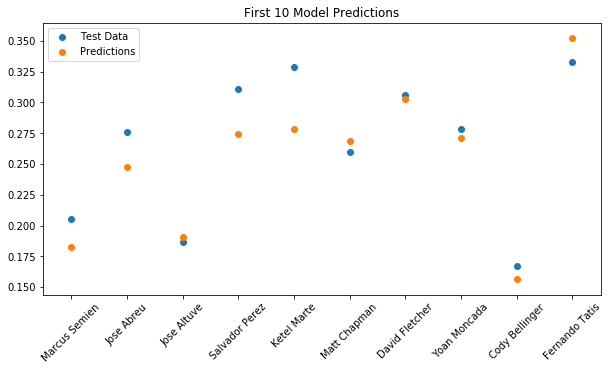

In [78]:
#LinearRegression Scoring on 2020 Data
lr_preds = score_new_dataset(lr_model, X_2020, y_2020)

### Random Forest 2020

Model Metrics
--------------------------------------------------


Model Score: 0.7216457124622087
MAE: 0.033530315789473686
MSE: 0.0019971776888788486


--------------------------------------------------------------------------------




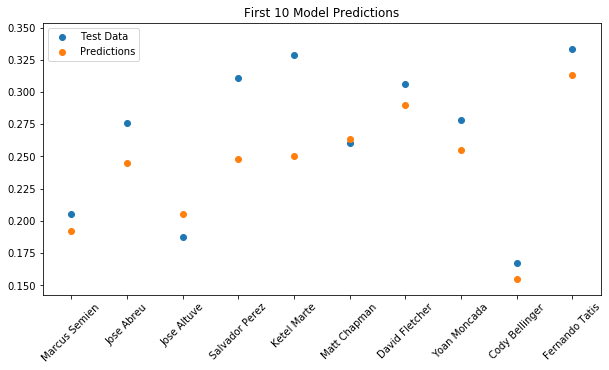

In [79]:
#RandomForest Scoring on 2020 Data
rf_preds = score_new_dataset(rf_model, X_2020, y_2020)

### Ridge 2020

Model Metrics
--------------------------------------------------


Model Score: 0.8456617793642139
MAE: 0.03189230720176795
MSE: 0.0019971776888788486


--------------------------------------------------------------------------------




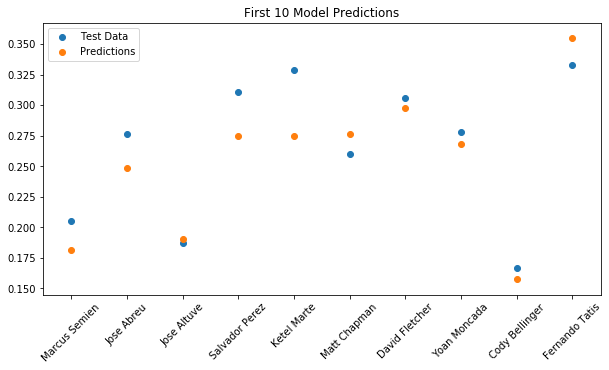

In [80]:
#RidgeRegression Scoring on 2020 Data
ridge_preds = score_new_dataset(ridge_model, X_2020, y_2020)

### Lasso 2020

Model Metrics
--------------------------------------------------


Model Score: -0.06781383900575544
MAE: 0.08571568283984944
MSE: 0.0019971776888788486


--------------------------------------------------------------------------------




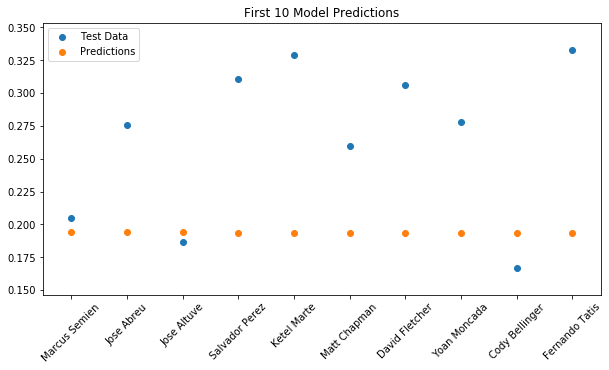

In [81]:
#LassoRegression Scoring on 2020 Data
lasso_preds = score_new_dataset(lasso_model, X_2020, y_2020)

### Elastic Net 2020

Model Metrics
--------------------------------------------------


Model Score: -0.06254676681058635
MAE: 0.08541657157835654
MSE: 0.0019971776888788486


--------------------------------------------------------------------------------




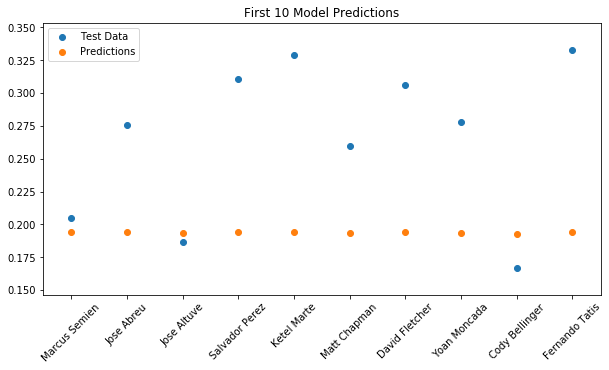

In [82]:
#ElasticNetRegression Scoring on 2020 Data
elastic_preds = score_new_dataset(elastic_model, X_2020, y_2020)

---

# Comparing the Top Models

- Linear Regression
- Random Forest
- Ridge

Plotting the various models agains the actual results from 2020.

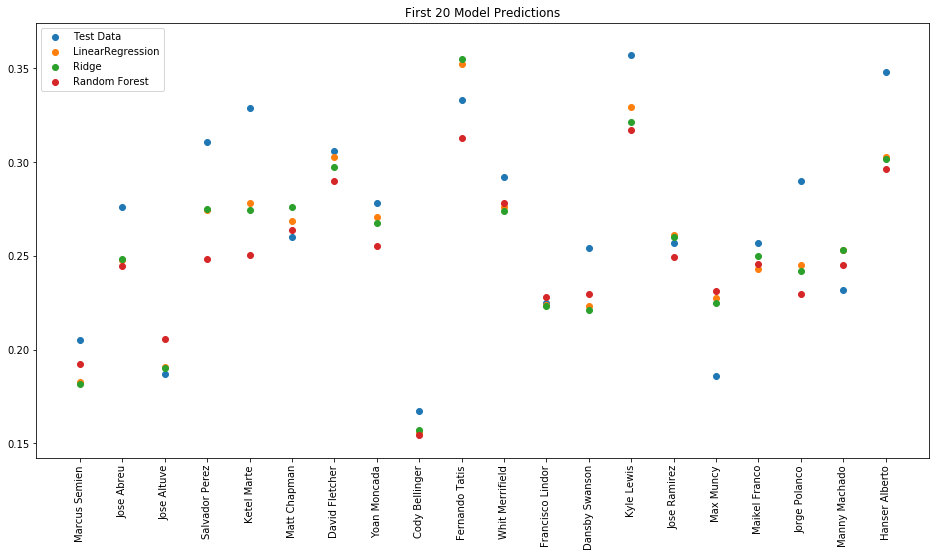

In [83]:
# Comparing All Models Top 20 Predictions
plt.figure(figsize=(16,8))
plt.title("First 20 Model Predictions")
plt.scatter(y_2020.index[:20], y_2020.values[:20])
plt.scatter(y_2020.index[:20], lr_preds[:20])
plt.scatter(y_2020.index[:20], ridge_preds[:20])
plt.scatter(y_2020.index[:20], rf_preds[:20])
plt.xticks(rotation=90)
plt.legend(['Test Data', 'LinearRegression', 'Ridge', 'Random Forest'], loc='upper left')

In [84]:
# LinearRegression Predictions
lr_predictions_df = pd.DataFrame({'Test Data': y_2020, 'LR Predictions':lr_preds})

In [85]:
# Lets see the lr_predictions_df 
lr_predictions_df.head()

,Test Data,LR Predictions
Player,,
Marcus Semien,0.205,0.182439
Jose Abreu,0.276,0.247536
Jose Altuve,0.187,0.190909
Salvador Perez,0.311,0.274251
Ketel Marte,0.329,0.278326


In [86]:
# RidgeRegression Predictions
ridge_predictions_df = pd.DataFrame({'Test Data': y_2020, 'Ridge Predictions':ridge_preds})

In [87]:
# Lets see the ridge_regression_df
ridge_predictions_df.head()

,Test Data,Ridge Predictions
Player,,
Marcus Semien,0.205,0.181415
Jose Abreu,0.276,0.248349
Jose Altuve,0.187,0.190186
Salvador Perez,0.311,0.274916
Ketel Marte,0.329,0.274650


In [88]:
# Exporting Model for later use
import pickle

filename_ridge = 'ridge_hitting_model.sav'
pickle.dump(ridge_model, open(filename_ridge, 'wb'))

filename_lr = 'lr_hitting_model.sav'
pickle.dump(lr_model, open(filename_lr, 'wb'))

---

# Final End of Season Statistical Predictions

In [109]:
# Bringing in the predictions
pitching_df = pd.read_csv('data/output_data/pitching_predictions.csv', index_col='Player')

lr_hitting_df = pd.read_csv('data/output_data/lr_hitting_predictions.csv', index_col='Player')
ridge_hitting_df = pd.read_csv('data/output_data/ridge_hitting_predictions.csv', index_col='Player')

## Pitching Predictions 2020 End of Season

In [110]:
# Pitching Preds
pitching_df.head()

,Real W,Predicted W
Player,,
Dylan Bundy,3,2.073079
Shane Bieber,3,2.587359
German Marquez,2,2.004976
Kyle Freeland,2,1.755144
Sonny Gray,3,1.903647


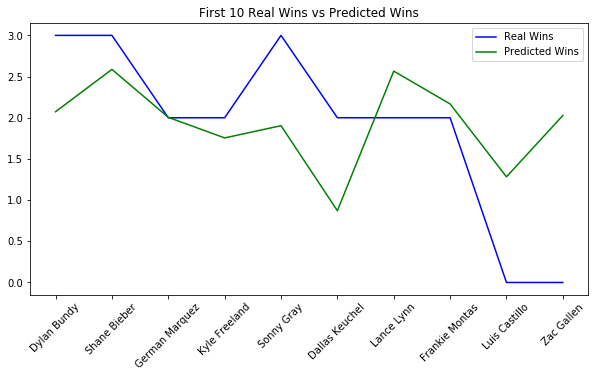

In [111]:
# Plotting out accuracy of pitching predictions
plt.figure(figsize=(10,5))
plt.title("First 10 Real Wins vs Predicted Wins")
plt.plot(pitching_df.index[:10], pitching_df['Real W'][:10], color='b')
plt.plot(pitching_df.index[:10], pitching_df['Predicted W'][:10], color='g')
plt.xticks(rotation=45)
plt.legend(['Real Wins', 'Predicted Wins'])
plt.show()

In [112]:
# Function to calculate Expected Pitcher Wins
def calc_xW(w): 
  if w != 0:
    return ((w / 18) * 60) * 2.25
  else:
    return 0

In [113]:
# Apply function from above
pitching_df['xW'] = pitching_df['Real W'].apply(calc_xW)

In [114]:
# Rename the columns
pitching_df = pitching_df.rename(columns={'Real W':'Current Wins', 'Predicted W':'Predicted Wins',
                                          'xW':'Current Predicted Wins (EOS)'})
pitching_df.head()

,Current Wins,Predicted Wins,Current Predicted Wins (EOS)
Player,,,
Dylan Bundy,3,2.073079,22.5
Shane Bieber,3,2.587359,22.5
German Marquez,2,2.004976,15.0
Kyle Freeland,2,1.755144,15.0
Sonny Gray,3,1.903647,22.5


***

## Hitting Predictions 2020 End of Season

In [115]:
# LR Hitting
lr_hitting_df.head()

,Test Data,LR Predictions
Player,,
Marcus Semien,0.205,0.179911
Jose Abreu,0.276,0.247535
Jose Altuve,0.187,0.189176
Salvador Perez,0.311,0.274311
Ketel Marte,0.329,0.276391


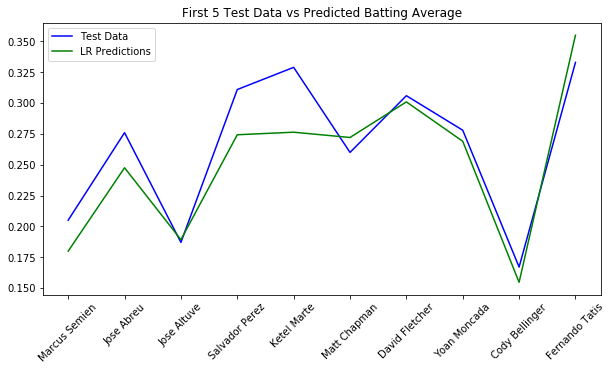

In [116]:
# Plotting out Accuracy of LinearRegressor Predictions for hitting
plt.figure(figsize=(10,5))
plt.title("First 5 Test Data vs Predicted Batting Average")
plt.plot(lr_hitting_df.index[:10], lr_hitting_df['Test Data'][:10], color='b')
plt.plot(lr_hitting_df.index[:10], lr_hitting_df['LR Predictions'][:10], color='g')
plt.xticks(rotation=45)
plt.legend(['Test Data', 'LR Predictions'])
plt.show()

In [117]:
# Ridge Hitting
ridge_hitting_df.head()

,Test Data,Ridge Predictions
Player,,
Marcus Semien,0.205,0.178495
Jose Abreu,0.276,0.247483
Jose Altuve,0.187,0.187987
Salvador Perez,0.311,0.274020
Ketel Marte,0.329,0.272489


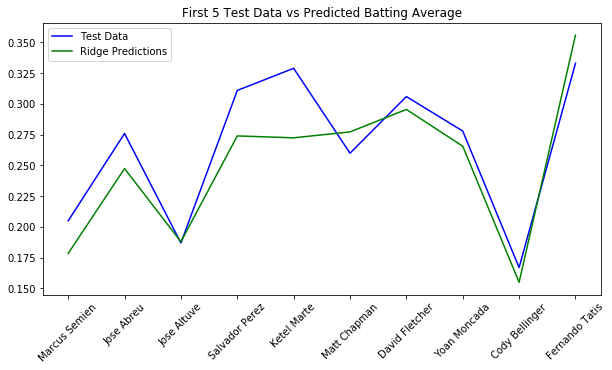

In [118]:
# Plotting out Accuracy of RidgeRegressor Predictions for hitting
plt.figure(figsize=(10,5))
plt.title("First 5 Test Data vs Predicted Batting Average")
plt.plot(ridge_hitting_df.index[:10], ridge_hitting_df['Test Data'][:10], color='b')
plt.plot(ridge_hitting_df.index[:10], ridge_hitting_df['Ridge Predictions'][:10], color='g')
plt.xticks(rotation=45)
plt.legend(['Test Data', 'Ridge Predictions'])
plt.show()

In [119]:
# Calculate xBA based on total 2020 games and number of games played 
def calc_xba(ba):
  if ba < 1.0: 
    return (ba / 18) * 60 - ba * 2
  else:
    return ba

In [120]:
# Apply function from above
ridge_hitting_df['xBA'] = ridge_hitting_df['Ridge Predictions'].apply(calc_xba)

In [121]:
# Rename some columns
ridge_hitting_df = ridge_hitting_df.rename(columns={'Test Data':'Current BA', 'Ridge Predictions':'BA Prediction',
                                                    'xBA':'Expected BA (EOS)'})
ridge_hitting_df.head()

,Current BA,BA Prediction,Expected BA (EOS)
Player,,,
Marcus Semien,0.205,0.178495,0.237993
Jose Abreu,0.276,0.247483,0.329978
Jose Altuve,0.187,0.187987,0.250649
Salvador Perez,0.311,0.274020,0.365360
Ketel Marte,0.329,0.272489,0.363319


---

# Findings

The 2020 MLB season and the players stats will be heavily effected by lack of games that will be played (60 total games). 

With this unexpected hitch in the 2020 season it makes it difficult to make time series predictions on the entire season. 

For this reason I had to use some math to predict the xBA (Expected Batting Averrage), and xW (Expected Pitching Wins). 
When using this math there is an upper limit of the accuracy.